# Plot all the light curves

In [19]:
import os
import sys
import math
import torch
import gpytorch
%load_ext autoreload
%autoreload 2

import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from astropy.timeseries import LombScargle
import pandas as pd
pd.set_option('precision', 0)
pd.set_option('display.float_format', lambda x: '%.16f' % x)

# Start the notebook from the root of the project
if 'notebooks' in os.getcwd():
    os.chdir(os.path.dirname(os.getcwd()))
    if os.getcwd().endswith('notebooks'):
        os.chdir(os.path.dirname(os.getcwd()))

 # Local imports (i.e., my code) from the src folder
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))

import experiment_util
from plot_helpers import *
plotter = PlotUtilGPyTorch()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# Make the notebook use the whole screen width
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [21]:
def normalize(series):
   median = np.median(series)
   series = (series / median) - 1
   std = series.std()
   return median, std, series

In [22]:
N_part = 13000

In [23]:
df = pd.read_csv("./data/sim_noisy_pulse.lc",sep=' ', header = None, names=['Time', 'Lc'], index_col=False, float_precision='round_trip')
X, Y = df['Time'].tolist(), df['Lc'].tolist()
X, Y = np.array(X), np.array(Y)
X, Y = X[:N_part], Y[:N_part]

In [24]:
gap = X[-1] - X[0]  # days since

In [25]:
gap

359.28359414311126

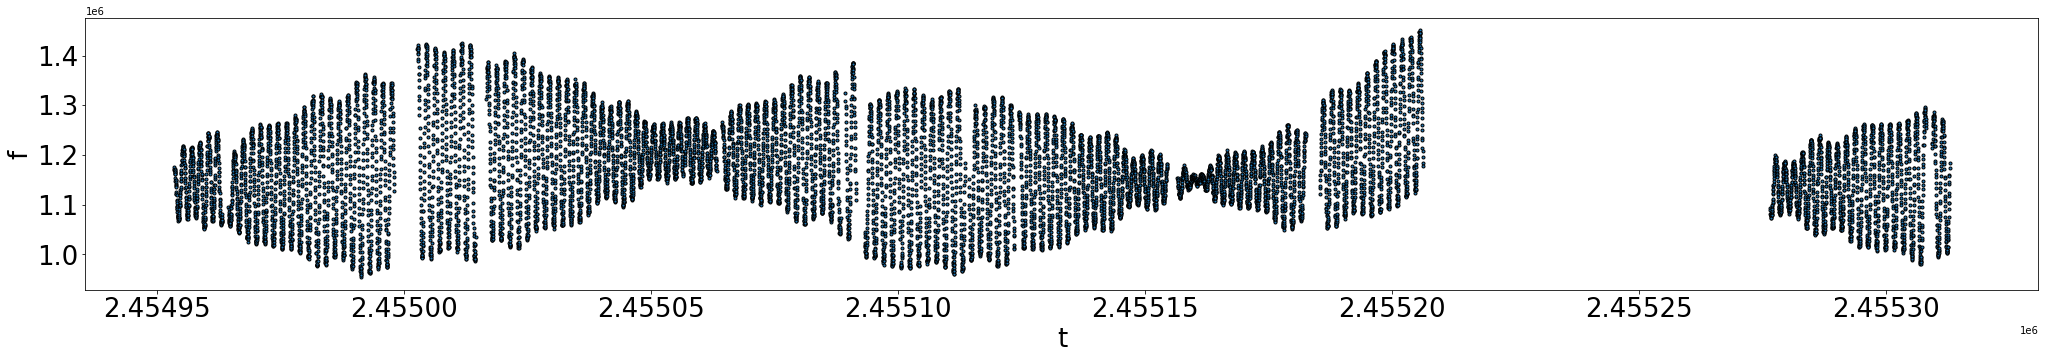

In [26]:
plotter.plot_data(X, Y)

In [27]:
df = pd.read_csv("./data/sim_noisy_pulse_eb.lc",sep=' ', header = None, names=['Time', 'Lc'], index_col=False, float_precision='round_trip')
X2_full, Y2_full = df['Time'].tolist(), df['Lc'].tolist()
X2_full, Y2_full = np.array(X2_full), np.array(Y2_full)
X2, Y2 = X2_full[:N_part], Y2_full[:N_part]

In [28]:
# Nr of days
X2_full[-1] - X2_full[0]

1470.4625075166114

In [29]:
# Nr of samples
nr_of_samples = len(X2_full)

In [30]:
# Sample period
X2_full[1] - X2_full[0]
exp_nr_of_samples = (X2_full[-1] - X2_full[0]) / (X2_full[1] - X2_full[0])
exp_nr_of_samples

71960.68197396868

In [31]:
(nr_of_samples / exp_nr_of_samples) * 100

72.22277301207421

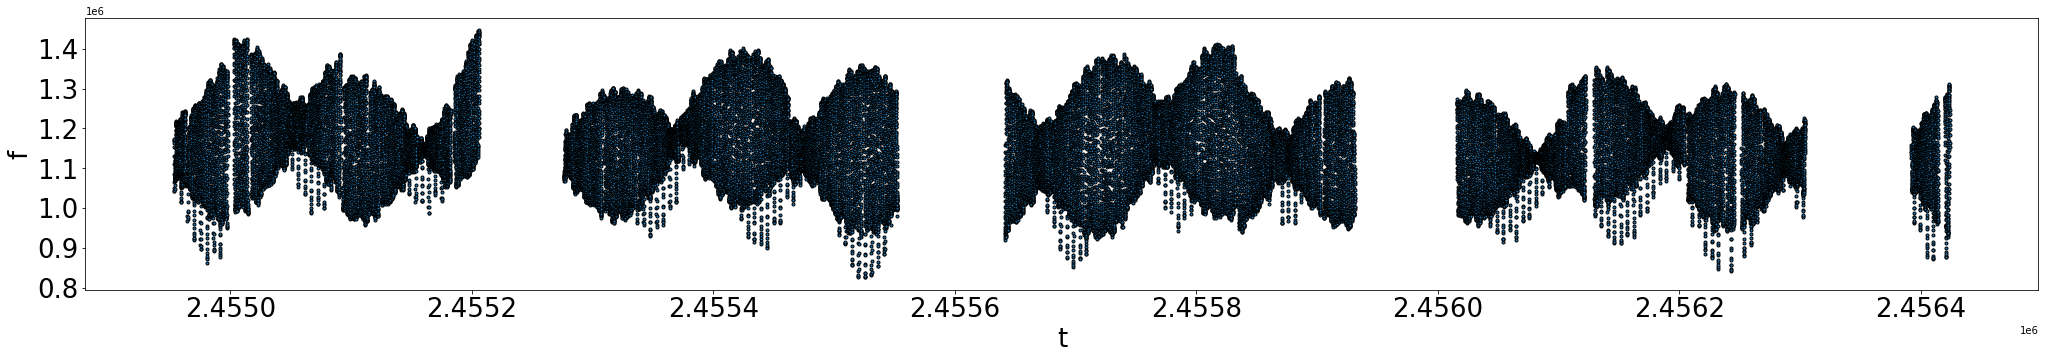

In [42]:
# Complete, full light curve
plotter.plot_data(X2_full, Y2_full)

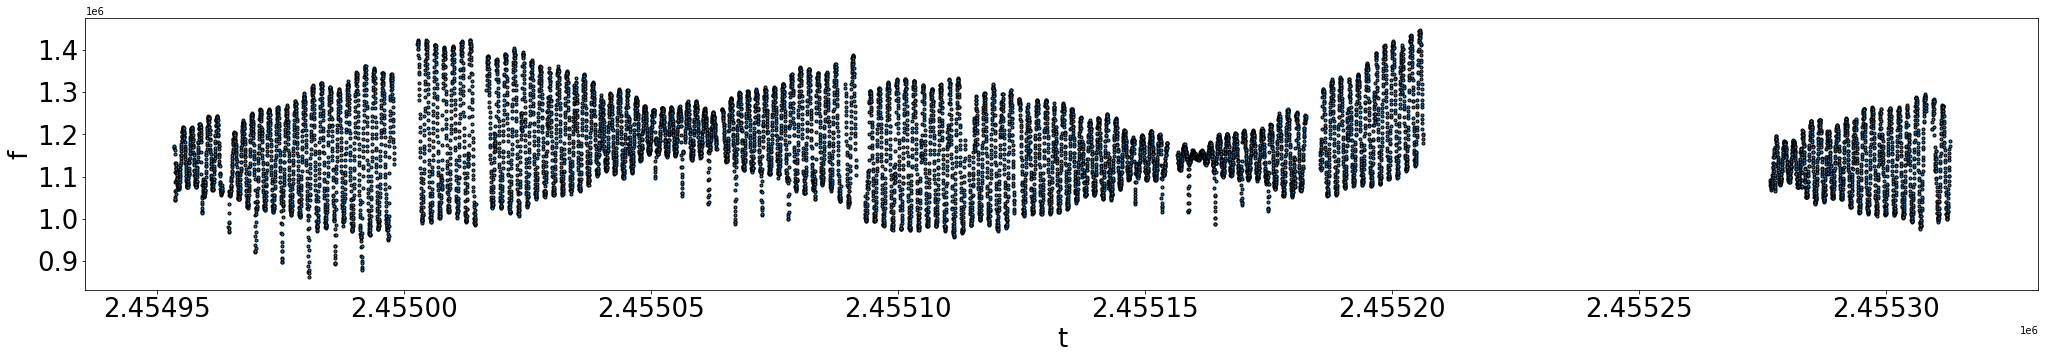

In [32]:
plotter.plot_data(X2, Y2)

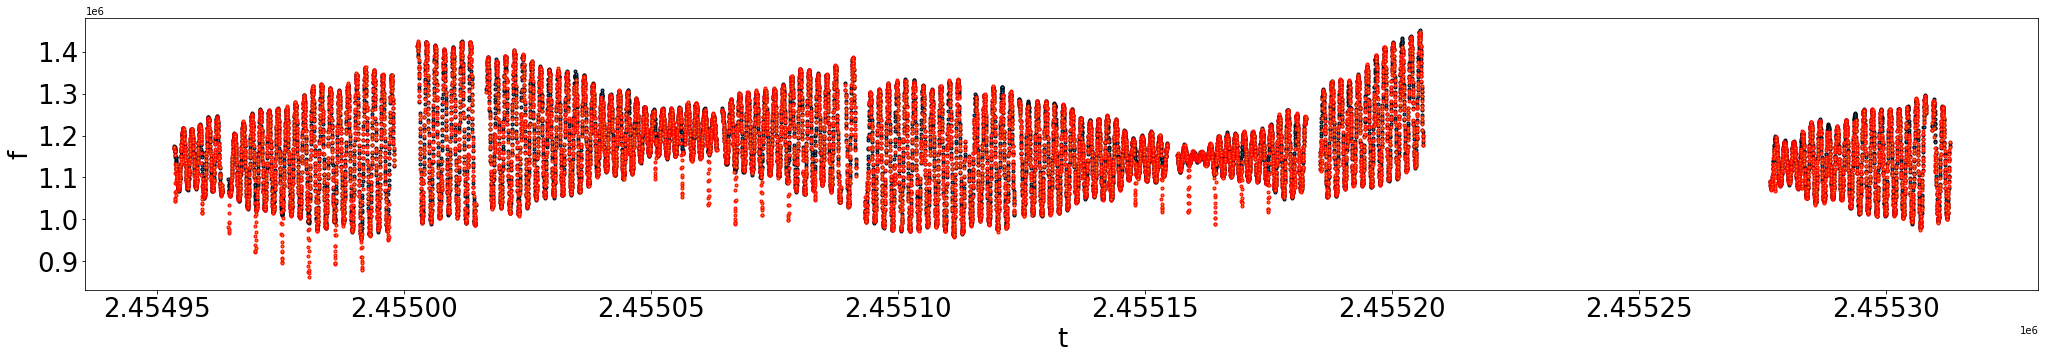

In [33]:
plotter.plot_data(X, Y, X2, Y2)

In [43]:
df = pd.read_csv("./data/sim_pulse.lc",sep=' ', header = None, names=['Time', 'Lc'], index_col=False, float_precision='round_trip')
X2_full, Y2_full = df['Time'].tolist(), df['Lc'].tolist()
X2_full, Y2_full = np.array(X2_full), np.array(Y2_full)
X2, Y2 = X2_full[:N_part], Y2_full[:N_part]

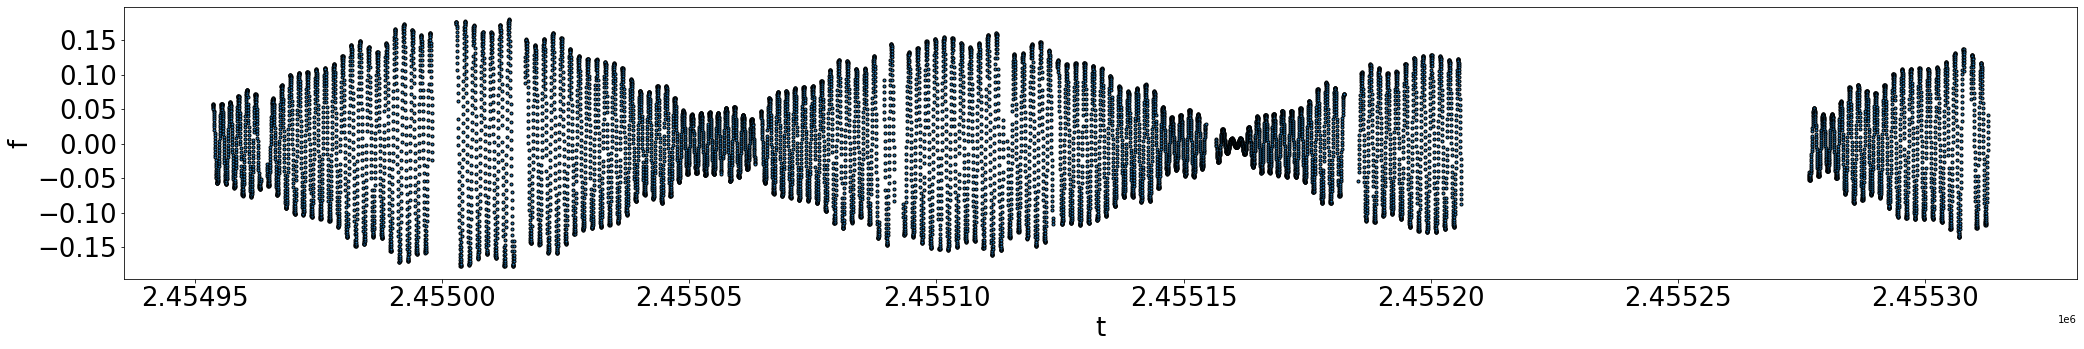

In [44]:
plotter.plot_data(X2, Y2)

In [45]:
df = pd.read_csv("./data/sim_eb.lc",sep=' ', header = None, names=['Time', 'Lc'], index_col=False, float_precision='round_trip')
X2_full, Y2_full = df['Time'].tolist(), df['Lc'].tolist()
X2_full, Y2_full = np.array(X2_full), np.array(Y2_full)
X2, Y2 = X2_full[:N_part], Y2_full[:N_part]

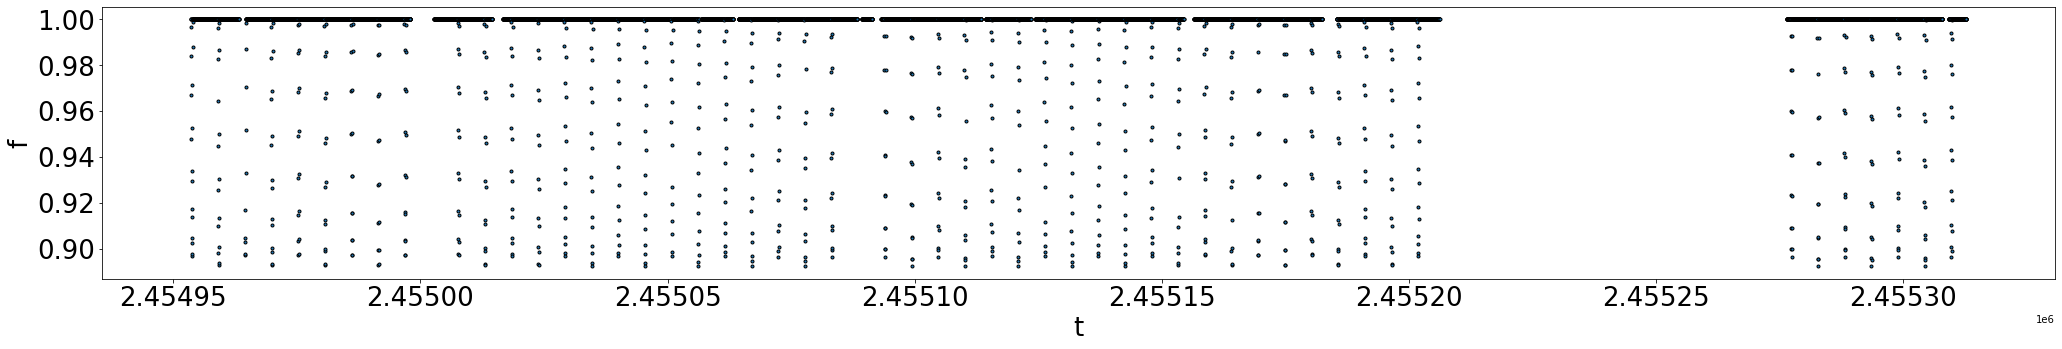

In [46]:
plotter.plot_data(X2, Y2)

In [47]:
df = pd.read_csv("./data/sim_pulse_eb.lc",sep=' ', header = None, names=['Time', 'Lc'], index_col=False, float_precision='round_trip')
X2_full, Y2_full = df['Time'].tolist(), df['Lc'].tolist()
X2_full, Y2_full = np.array(X2_full), np.array(Y2_full)
X2, Y2 = X2_full[:N_part], Y2_full[:N_part]

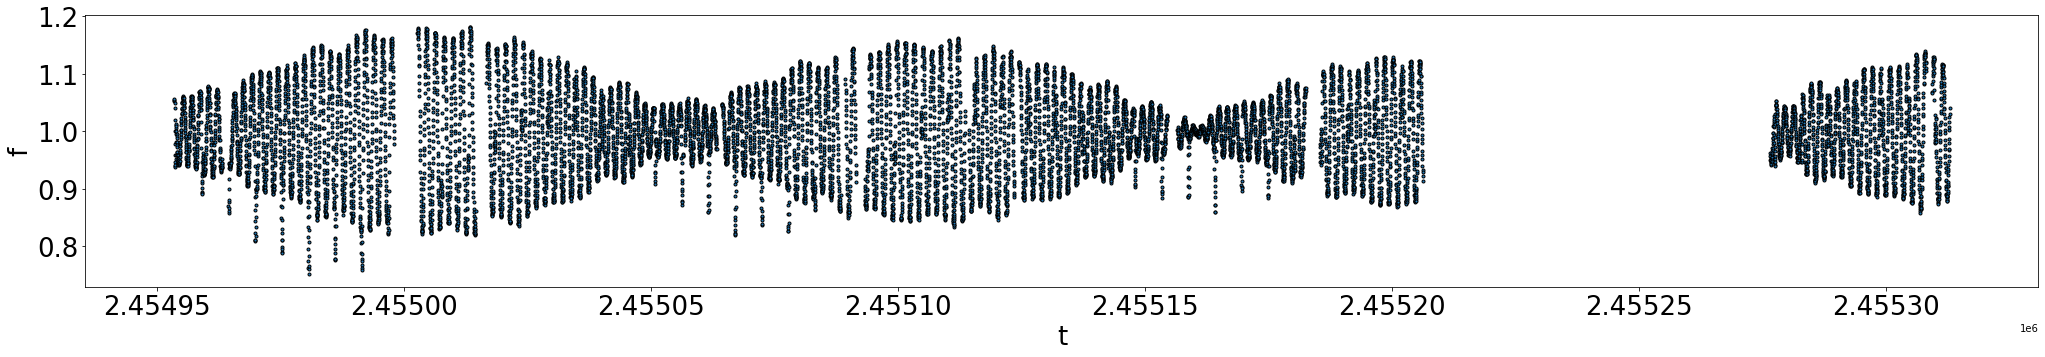

In [48]:
plotter.plot_data(X2, Y2)